## Android Permission

Goal:
Estimating the rating of an android application based on permissions and features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [2]:
df=pd.read_csv("Android_Permission.csv")

In [3]:
df.head(2)

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),...,Your accounts : Google Docs (D),Your accounts : Google Finance (D),Your accounts : Google Maps (D),Your accounts : Google Spreadsheets (D),Your accounts : Google Voice (D),Your accounts : Google mail (D),Your accounts : Picasa Web Albums (D),Your accounts : YouTube (D),Your accounts : YouTube usernames (D),Your accounts : access all Google services (S),Your accounts : access other Google services (D),Your accounts : act as an account authenticator (D),Your accounts : act as the AccountManagerService (S),Your accounts : contacts data in Google accounts (D),Your accounts : discover known accounts (S),Your accounts : manage the accounts list (D),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : Send Gmail (S),Your messages : edit SMS or MMS (D),Your messages : modify Gmail (D),Your messages : read Gmail (D),Your messages : read Gmail attachment previews (D),Your messages : read SMS or MMS (D),Your messages : read instant messages (D),Your messages : receive MMS (D),Your messages : receive SMS (D),Your messages : receive WAP (D),Your messages : send SMS-received broadcast (S),Your messages : send WAP-PUSH-received broadcast (S),Your messages : write instant messages (D),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : choose widgets (S),Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal i

In [4]:
df.tail(2)

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),...,Your accounts : Google Docs (D),Your accounts : Google Finance (D),Your accounts : Google Maps (D),Your accounts : Google Spreadsheets (D),Your accounts : Google Voice (D),Your accounts : Google mail (D),Your accounts : Picasa Web Albums (D),Your accounts : YouTube (D),Your accounts : YouTube usernames (D),Your accounts : access all Google services (S),Your accounts : access other Google services (D),Your accounts : act as an account authenticator (D),Your accounts : act as the AccountManagerService (S),Your accounts : contacts data in Google accounts (D),Your accounts : discover known accounts (S),Your accounts : manage the accounts list (D),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : Send Gmail (S),Your messages : edit SMS or MMS (D),Your messages : modify Gmail (D),Your messages : read Gmail (D),Your messages : read Gmail attachment previews (D),Your messages : read SMS or MMS (D),Your messages : read instant messages (D),Your messages : receive MMS (D),Your messages : receive SMS (D),Your messages : receive WAP (D),Your messages : send SMS-received broadcast (S),Your messages : send WAP-PUSH-received broadcast (S),Your messages : write instant messages (D),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : choose widgets (S),Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal i

In [5]:
df.shape

(29999, 184)

In [6]:
df.columns

Index(['App', 'Package', 'Category', 'Description', 'Rating',
       'Number of ratings', 'Price', 'Related apps',
       'Dangerous permissions count', 'Safe permissions count',
       ...
       'Your personal information : read calendar events (D)',
       'Your personal information : read contact data (D)',
       'Your personal information : read sensitive log data (D)',
       'Your personal information : read user defined dictionary (D)',
       'Your personal information : retrieve system internal state (S)',
       'Your personal information : set alarm in alarm clock (S)',
       'Your personal information : write Browser's history and bookmarks (D)',
       'Your personal information : write contact data (D)',
       'Your personal information : write to user defined dictionary (S)',
       'Class'],
      dtype='object', length=184)

In [7]:
df.describe()

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count,Default : Access DRM content. (S),Default : Access Email provider data (S),Default : Access all system downloads (S),Default : Access download manager. (S),Default : Advanced download manager functions. (S),Default : Audio File Access (S),Default : Install DRM content. (S),Default : Modify Google service configuration (S),Default : Modify Google settings (S),Default : Move application resources (S),Default : Read Google settings (S),Default : Send download notifications. (S),Default : Voice Search Shortcuts (S),Default : access SurfaceFlinger (S),Default : access checkin properties (S),Default : access the cache filesystem (S),Default : access to passwords for Google accounts (S),Default : act as an account authenticator (S),Default : bind to a wallpaper (S),Default : bind to an input method (S),Default : change screen orientation (S),Default : coarse (network-based) location (S),Default : control location update notifications (S),Default : control system backup and restore (S),Default : delete applications (S),Default : delete other applications' caches (S),Default : delete other applications' data (S),Default : directly call any phone numbers (S),Default : directly install applications (S),Default : disable or modify status bar (S),Default : discover known accounts (S),Default : display unauthorized windows (S),Default : enable or disable application components (S),Default : force application to close (S),Default : force device reboot (S),Default : full Internet access (S),Default : interact with a device admin (S),Default : manage application tokens (S),Default : mock location sources for testing (S),Default : modify battery statistics (S),Default : modify secure system settings (S),Default : modify the Google services map (S),Default : modify/delete USB storage contents modify/delete SD card contents (S),Default : monitor and control all application launching (S),Default : partial shutdown (S),...,Your accounts : Google Docs (D),Your accounts : Google Finance (D),Your accounts : Google Maps (D),Your accounts : Google Spreadsheets (D),Your accounts : Google Voice (D),Your accounts : Google mail (D),Your accounts : Picasa Web Albums (D),Your accounts : YouTube (D),Your accounts : YouTube usernames (D),Your accounts : access all Google services (S),Your accounts : access other Google services (D),Your accounts : act as an account authenticator (D),Your accounts : act as the AccountManagerService (S),Your accounts : contacts data in Google accounts (D),Your accounts : discover known accounts (S),Your accounts : manage the accounts list (D),Your accounts : read Google service configuration (S),Your accounts : use the authentication credentials of an account (D),Your accounts : view configured accounts (S),Your location : access extra location provider commands (S),Your location : coarse (network-based) location (D),Your location : fine (GPS) location (D),Your location : mock location sources for testing (D),Your messages : Read Email attachments (D),Your messages : Send Gmail (S),Your messages : edit SMS or MMS (D),Your messages : modify Gmail (D),Your messages : read Gmail (D),Your messages : read Gmail attachment previews (D),Your messages : read SMS or MMS (D),Your messages : read instant messages (D),Your messages : receive MMS (D),Your messages : receive SMS (D),Your messages : receive WAP (D),Your messages : send SMS-received broadcast (S),Your messages : send WAP-PUSH-received broadcast (S),Your messages : write instant messages (D),Your personal information : add or modify calendar events and send email to guests (D),Your personal information : choose widgets (S),Your personal information : read Browser's history and bookmarks (D),Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictio

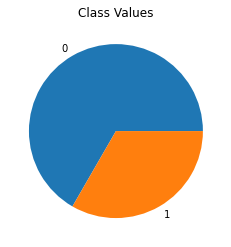

In [9]:
plt.pie(df.Class.value_counts(),labels=df.Class.unique())
plt.title("Class Values");

In [10]:
df.isnull().sum().sort_values(ascending=False)

Related apps                                   755
Dangerous permissions count                    204
Description                                      3
App                                              1
System tools : set wallpaper size hints (S)      0
                                              ... 
Default : run in factory test mode (S)           0
Default : set time (S)                           0
Default : set wallpaper size hints (S)           0
Default : start IM service (S)                   0
Class                                            0
Length: 184, dtype: int64

In [11]:
df.drop(["Description","Related apps"],axis=1,inplace=True)

In [12]:
df=df[df["Dangerous permissions count"]>=0]
df=df[df["App"].notna()]

<AxesSubplot:>

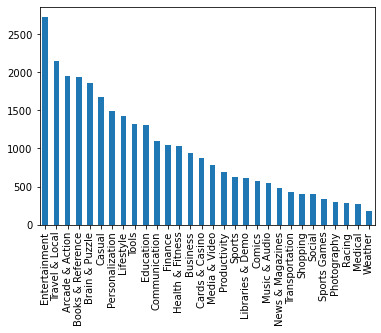

In [13]:
df.Category.value_counts().plot.bar()

<AxesSubplot:xlabel='Rating'>

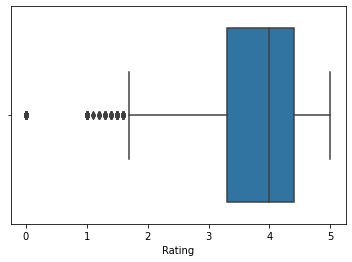

In [14]:
sns.boxplot("Rating",data=df)

<AxesSubplot:xlabel='Dangerous permissions count'>

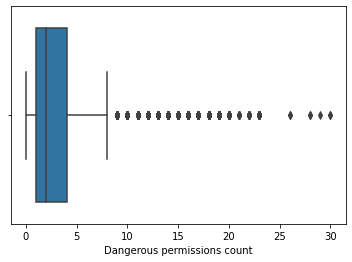

In [15]:
sns.boxplot("Dangerous permissions count",data=df)

In [16]:
df.shape

(29794, 182)

In [17]:
x,y=df.drop(["Rating","App"],axis=1),df["Rating"]
x=pd.get_dummies(x,drop_first=True)

In [18]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    #from sklearn.linear_model import Ridge,Lasso
    #from sklearn.linear_model import ElasticNet
    #from sklearn.tree import ExtraTreeRegressor
    #from sklearn.ensemble import GradientBoostingRegressor
    #from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
   
    
    algos=[L]
    algo_names=['LinearRegression']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [19]:
regression_funct(x,y)

,R_Squared,RMSE,MAE
LinearRegression,-0.001152,1.414593,0.895494


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [21]:
x=scaler.fit_transform(x)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [23]:
model=Sequential()
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')#mse regression

In [24]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=50, verbose=1)

Epoch 1/50
187/187 [==============================] - 52s 138ms/step - loss: 2.0350 - val_loss: 1.6633
Epoch 2/50
187/187 [==============================] - 19s 102ms/step - loss: 0.7093 - val_loss: 1.4947
Epoch 3/50
187/187 [==============================] - 19s 103ms/step - loss: 0.2824 - val_loss: 1.5072
Epoch 4/50
187/187 [==============================] - 19s 102ms/step - loss: 0.1378 - val_loss: 1.4744
Epoch 5/50
187/187 [==============================] - 19s 103ms/step - loss: 0.0792 - val_loss: 1.4283
Epoch 6/50
187/187 [==============================] - 20s 105ms/step - loss: 0.0486 - val_loss: 1.4206
Epoch 7/50
187/187 [==============================] - 20s 107ms/step - loss: 0.0325 - val_loss: 1.4254
Epoch 8/50
187/187 [==============================] - 21s 112ms/step - loss: 0.0228 - val_loss: 1.4234
Epoch 9/50
187/187 [==============================] - 20s 107ms/step - loss: 0.0183 - val_loss: 1.4311
Epoch 10/50
187/187 [==============================] - 20s 109ms/step - l

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               12036096  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               2

In [33]:
scores=model.evaluate(x,y)

932/932 [==============================] - 19s 14ms/step - loss: 0.3438
